### Machine Learning Analysis on Thyroid Data


In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
thyroid_data = pd.read_csv('datasets/thyroid_data.csv')
print(thyroid_data.columns)

Index(['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH',
       'Abs_diff_TSH', 'Outcome'],
      dtype='object')


In [49]:
thyroid_data.shape

(215, 6)

In [50]:
thyroid_data.head()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [56]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   T3_resin                215 non-null    int64  
 1   Serum_thyroxin          215 non-null    float64
 2   Serum_triiodothyronine  215 non-null    float64
 3   Basal_TSH               215 non-null    float64
 4   Abs_diff_TSH            215 non-null    float64
 5   Outcome                 215 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


array([[<AxesSubplot:title={'center':'T3_resin'}>,
        <AxesSubplot:title={'center':'Serum_thyroxin'}>],
       [<AxesSubplot:title={'center':'Serum_triiodothyronine'}>,
        <AxesSubplot:title={'center':'Basal_TSH'}>],
       [<AxesSubplot:title={'center':'Abs_diff_TSH'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

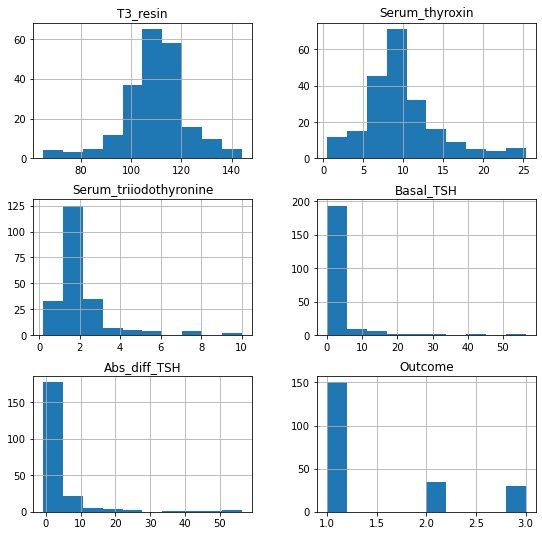

In [57]:
thyroid_data.hist(figsize=(9, 9))

In [19]:
thyroid_data.isnull().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [20]:
thyroid_data.isna().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [10]:
# Features/Response
feature_names = ['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH', 'Abs_diff_TSH']
X = thyroid_data[feature_names]
y = thyroid_data.Outcome

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


In [12]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))

In [15]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=None)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.925758
1   DT  0.944156
2  GNB  0.967749
3  BNB  0.734848


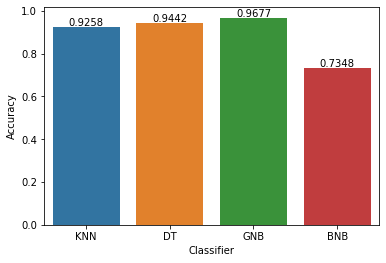

In [16]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()